In [75]:
import os #getting access to input files

# 1. Set Environment and load packages

In [76]:
os.chdir("C:/Users/Abhishek/Desktop/Cab_Prac_DOS/Python_Cab")

In [77]:
#Importing required libraries
import pandas as pd # Importing pandas for performing EDA
import numpy as np  # Importing numpy for Linear Algebric operations
import matplotlib.pyplot as plt # Importing for Data Visualization
import seaborn as sns # Importing for Data Visualization
from collections import Counter 
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split #splitting dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV
import joblib

#%matplotlib inline

# 2. Load dataset and study the data,details of attribute

In [78]:
#Loading the data:
train  = pd.read_csv("train_cab.csv",na_values={"pickup_datetime":"43"})
test   = pd.read_csv("test.csv")

In [79]:
train.head(3)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0


In [80]:
test.head(3)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1


In [81]:
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [82]:
test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [83]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [84]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [85]:
train.shape

(16067, 7)

In [86]:
test.shape

(9914, 6)

# 3.Exploratory data Analysis

### 3.1 Change datatype of required Variables

In [87]:
da=pd.DataFrame(train. dtypes)
da

,0
fare_amount,object
pickup_datetime,object
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,float64


In [88]:
train['fare_amount']=pd.to_numeric(train['fare_amount'],errors="coerce") #Using errors=’coerce’. It will replace all non-numeric values with NaN.

In [89]:
train['pickup_datetime'].isna().sum()

1

In [90]:
#Drop this Value before changing datatype
train=train.dropna(subset=['pickup_datetime'])

In [91]:
train['pickup_datetime']=pd.to_datetime(train['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')

In [92]:
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

### 3.2 Remove unrealistic values(Outliers) from Attributes

PASSENGER COUNT

(0, 10)

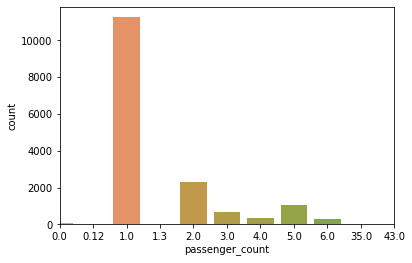

In [93]:
sns.countplot(train["passenger_count"])
plt.xlim(0,10)

In [94]:
#Delete all <1 and >6
train["passenger_count"].describe()

count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [95]:
train=train.drop(train[train["passenger_count"]>6].index,axis=0)
train=train.drop(train[train["passenger_count"]<1].index,axis=0)

In [96]:
train.shape

(15988, 7)

FARE AMOUNT

In [97]:
train['fare_amount'].describe()
#min is -3.000
#Delete all below 0

count    15964.000000
mean        15.044275
std        431.510971
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [98]:
train=train.drop(train[train["fare_amount"]<1].index,axis=0)

In [99]:
train['fare_amount'].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 15983, dtype: float64

In [100]:
#In Fare amount There is a huge difference between top 3 and other values so we will remove the rows having fare amounting more that 454 as considering them as outliers

train = train.drop(train[train["fare_amount"]> 454 ].index, axis=0)
train.shape

(15981, 7)

 pickup lattitude and longitude :

In [101]:
#Longitude Range : -180 to 180
#Lattitude: -90 to 90

# we need to drop the rows having  pickup lattitute and longitute out the range mentioned above

print("pickup_latitude <90 :",train[train['pickup_latitude']<-90].index)
print("pickup_latitude >90 :",train[train['pickup_latitude']>90].index)
#there is one >90, have to drop that

pickup_latitude <90 : Int64Index([], dtype='int64')
pickup_latitude >90 : Int64Index([5686], dtype='int64')


In [102]:
train = train.drop(train[train['pickup_latitude']>90].index,axis=0)

In [103]:
train[train['pickup_longitude']<-180]
train[train['pickup_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [104]:
train[train['dropoff_latitude']<-90]
train[train['dropoff_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [105]:
train[train['dropoff_longitude']<-180]
train[train['dropoff_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [106]:
train.shape

(15980, 7)

# 4.Missing value Analysis

In [107]:
#Check For Test Dataset
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [108]:
#Check For Train Dataset
missing_val = pd.DataFrame(train.isnull().sum())

In [109]:
missing_val=missing_val.reset_index()
missing_val

,index,0
0,fare_amount,24
1,pickup_datetime,0
2,pickup_longitude,0
3,pickup_latitude,0
4,dropoff_longitude,0
5,dropoff_latitude,0
6,passenger_count,55


In [110]:
missing_val=missing_val.rename(columns={"index" : "Variable",0:"Missing Percentage"})

In [111]:
missing_val

,Variable,Missing Percentage
0,fare_amount,24
1,pickup_datetime,0
2,pickup_longitude,0
3,pickup_latitude,0
4,dropoff_longitude,0
5,dropoff_latitude,0
6,passenger_count,55


In [112]:
missing_val['Missing Percentage']=(missing_val["Missing Percentage"]/ len(train))*100

In [113]:
missing_val=missing_val.sort_values("Missing Percentage",ascending=False)

In [114]:
missing_val

,Variable,Missing Percentage
6,passenger_count,0.344180
0,fare_amount,0.150188
1,pickup_datetime,0.000000
2,pickup_longitude,0.000000
3,pickup_latitude,0.000000
4,dropoff_longitude,0.000000
5,dropoff_latitude,0.000000


In [115]:
df=train
#train=df

## 4.2 Impute the missing values

Try Mean,median,KNN.
We wont be using mode because the most frequent value will dominate the imputing values

#fare Amount :Value at [10] = 5.3,set it t0 0 and impute using :
- using mean :11.37
- using median :8.5
- using KNN :5.97894

Therefore we will use KNN to impute the missing values

In [116]:
# Choosing a random values to replace it as NA
a=train['fare_amount'].loc[10]
print('fare_amount at loc-10:{}'.format(a))
# Replacing 10 with NA
train['fare_amount'].loc[10] = np.nan
print('Value after replacing with nan:{}'.format(train['fare_amount'].loc[10]))
# Impute with mean
print('Value if imputed with mean:{}'.format(train['fare_amount'].fillna(train['fare_amount'].mean()).loc[10]))
# Impute with median
print('Value if imputed with median:{}'.format(train['fare_amount'].fillna(train['fare_amount'].median()).loc[10]))

fare_amount at loc-10:5.3
Value after replacing with nan:nan
Value if imputed with mean:11.374527734252563
Value if imputed with median:8.5


F:\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [117]:
#Dropping pickup_datetime because KNN cant impute timestamp variable
columns=['fare_amount', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count']
Pickup_datetime=pd.DataFrame(train['pickup_datetime'])

In [118]:
train['fare_amount'].loc[1] = np.nan

In [119]:
train = pd.DataFrame(KNNImputer(n_neighbors=19).fit_transform(train.drop('pickup_datetime',axis=1)),columns=columns, index=train.index)

In [120]:
train['fare_amount'].iloc[10]

5.9789473684210535

In [121]:
a=train['fare_amount'].loc[1]
print('fare_amount at loc-1000:{}'.format(a))

fare_amount at loc-1000:17.12105263157895


In [122]:
# Round off the Passenger count, as it cannot be in decimal points
train['passenger_count']=train['passenger_count'].round()

In [123]:
train['passenger_count'].unique()

array([1., 2., 3., 6., 5., 4.])

In [124]:
train.isnull().sum() #All values have been imputed

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

# 5.Outlier Analysis

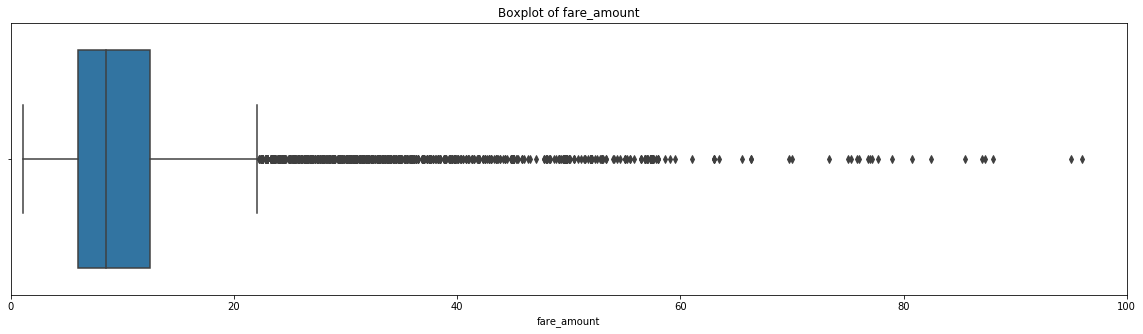

In [125]:
plt.figure(figsize=(20,5)) #size in terms of width and height
plt.xlim(0,100) #Range to be displayed on x axis
sns.boxplot(x=train['fare_amount'],data=train,orient='h')
plt.title('Boxplot of fare_amount')
plt.show()

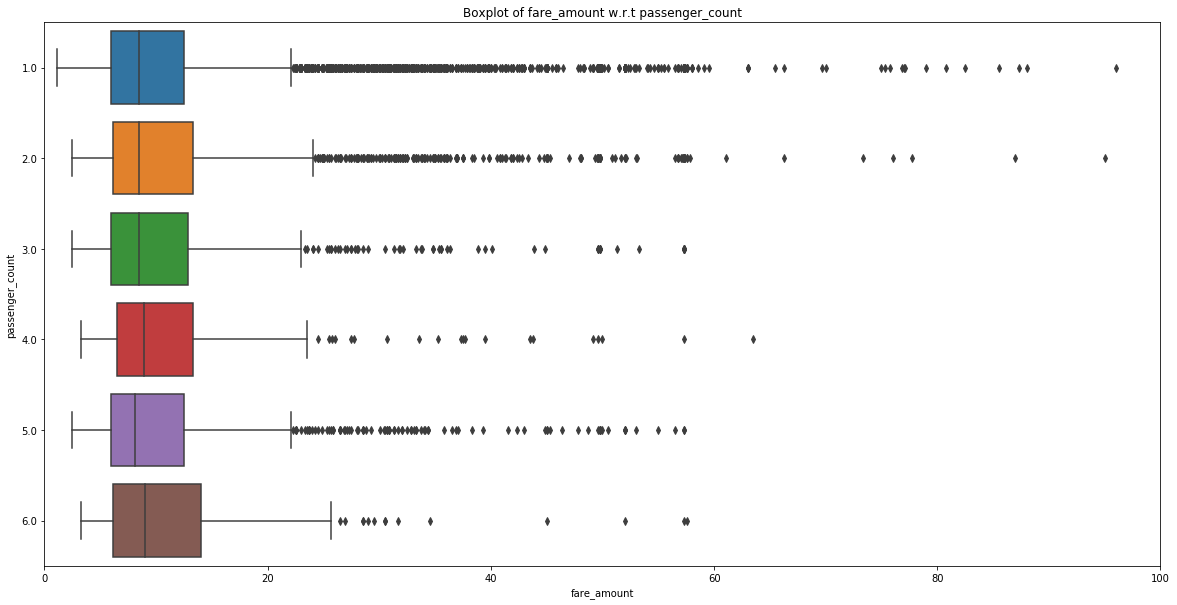

In [126]:
plt.figure(figsize=(20,10))
plt.xlim(0,100)
_ = sns.boxplot(x=train['fare_amount'],y=train['passenger_count'],data=train,orient='h')
plt.title('Boxplot of fare_amount w.r.t passenger_count')
plt.show()

In [127]:
#Define function to calculate the outlier and replace it with NA
def rem_outlier(col):
    #Np.percentile() will give the 75&25 percentile
    q75, q25 = np.percentile(train[col], [75 ,25])
    print("Q 75 is :",q75,"Q 25 is :",q25)
    #Calculate IQR
    iqr = q75 - q25
    #Calculate inner and outer fence
    min_Val = q25 - (iqr*1.5)
    max_Val = q75 + (iqr*1.5)
    print("Minimum is :",min_Val,"Maximum is :",max_Val)
    #Replace with NA
    train.loc[train[col] < min_Val,col] = np.nan
    train.loc[train[col] > max_Val,col] = np.nan

In [128]:
# for i in num_var:
rem_outlier('fare_amount')
#min value is in minus so lower i.e Q25 is wrong but we have already deleted values less than 0 so its okay
#     rem_outlier('pickup_longitude')
#     rem_outlier('pickup_latitude')
#     rem_outlier('dropoff_longitude')
#     rem_outlier('dropoff_latitude')

Q 75 is : 12.5 Q 25 is : 6.0
Minimum is : -3.75 Maximum is : 22.25


In [129]:
train["fare_amount"].describe()

count    14587.000000
mean         8.905577
std          4.135913
min          1.140000
25%          5.700000
50%          8.000000
75%         11.000000
max         22.100000
Name: fare_amount, dtype: float64

In [130]:
pd.DataFrame(train.isnull().sum())

,0
fare_amount,1393
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [131]:
#Imputing with missing values using KNN
train = pd.DataFrame(KNNImputer(n_neighbors=19).fit_transform(train), columns = train.columns, index=train.index)

In [132]:
pd.DataFrame(train.isnull().sum())

,0
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


# 6.Feature Engineering

### Derive field like year, month, day of the week, etc from datetime

In [133]:
# we will Join 2 Dataframes pickup_datetime and train
train=pd.merge(Pickup_datetime,train,right_index=True,left_index=True)

In [134]:
test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"],format= "%Y-%m-%d %H:%M:%S UTC")

In [135]:
#test_pickup_datetime=test["pickup_datetime"]

In [136]:
### we will separate the Pickup_datetime column into separate field like year, month, day of the week, etc

test['year'] = test['pickup_datetime'].dt.year
test['Month'] = test['pickup_datetime'].dt.month
test['Date'] = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour
test['Minute'] = test['pickup_datetime'].dt.minute

In [137]:
### we will separate the Pickup_datetime column into separate field like year, month, day of the week, etc

train['year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

### Derive distance using Latitudes and longitudes

In [138]:
#As we know that we have given pickup longitute and latitude values and same for drop. 
#Calculate the distance Using the haversine formula, create a new variable :distance.
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km
# 1min 

In [139]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [140]:
train.isnull().sum()

pickup_datetime      0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
distance             0
dtype: int64

In [141]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
distance             0
dtype: int64

In [142]:
train.head()

,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2009-06-15 17:26:21,4.500000,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,26,1.030764
1,2010-01-05 16:52:16,17.121053,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,52,8.450134
2,2011-08-18 00:35:00,5.700000,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,35,1.389525
3,2012-04-21 04:30:42,7.700000,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,30,2.799270
4,2010-03-09 07:51:00,5.300000,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,51,1.999157


In [143]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [144]:
train.dtypes

pickup_datetime      datetime64[ns]
fare_amount                 float64
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
distance                    float64
dtype: object

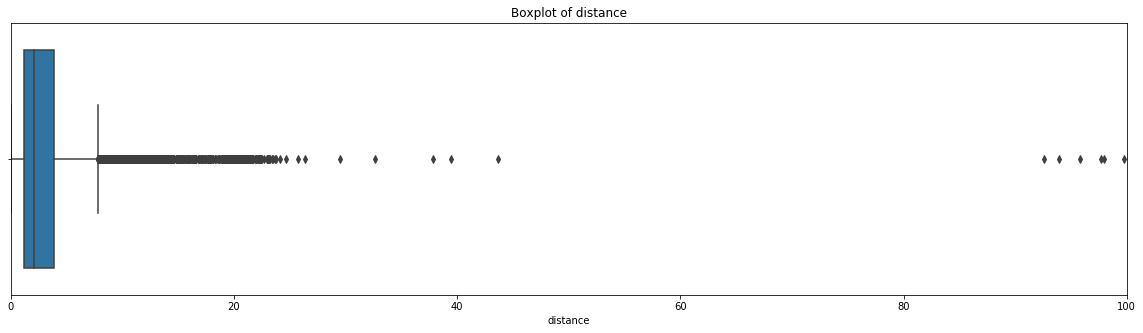

In [145]:
plt.figure(figsize=(20,5)) #size in terms of width and height
plt.xlim(0,100) #Range to be displayed on x axis
sns.boxplot(x=train['distance'],data=train,orient='h')
plt.title('Boxplot of distance')
# plt.savefig('bp of distance.png')
plt.show()

In [146]:
Counter(train['distance'] == 0)

Counter({False: 15524, True: 456})

In [147]:
Counter(test['distance'] == 0)

Counter({False: 9829, True: 85})

In [148]:
#Dropping all where Distance is = 0, as it cant be zero
train=train.drop(train[train["distance"]==0].index,axis=0)
test=test.drop(test[test["distance"]==0].index,axis=0)

In [149]:
train.shape

(15524, 14)

In [150]:
test['distance'].isna().sum()

0

In [151]:
train['distance'].isnull().sum()

0

In [152]:
train['distance'].describe()

count    15524.000000
mean        15.453362
std        315.495489
min          0.000111
25%          1.278147
50%          2.194873
75%          3.949297
max       8667.542104
Name: distance, dtype: float64

In [153]:
train.head(5)

,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2009-06-15 17:26:21,4.500000,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,26,1.030764
1,2010-01-05 16:52:16,17.121053,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,52,8.450134
2,2011-08-18 00:35:00,5.700000,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,35,1.389525
3,2012-04-21 04:30:42,7.700000,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,30,2.799270
4,2010-03-09 07:51:00,5.300000,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,51,1.999157


In [154]:
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
train = train.drop(drop, axis = 1)
test = test.drop(drop, axis = 1)

In [155]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


# 7.Feature Selection

In [156]:
train.dtypes
#We will do correlation analysis as we have numeric Data

fare_amount        float64
passenger_count    float64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [157]:
df_cor=train

In [158]:
#sns.pairplot(train)

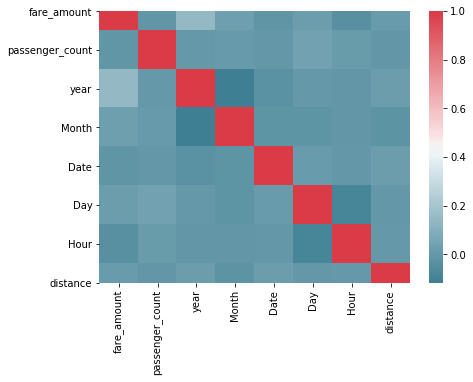

In [159]:
#Set heightand width of the plot
f, ax=plt.subplots(figsize=(7,5)) #plt=matplot library

#Generate correlation matrix
corr=df_cor.corr()

#plot using Seaborn library
 #sns is seaborn library,helps to plot visualization
 #masks will create individual logs or correlation matrix, np.zeros_like function will create Square shaped bracket for the pane 
 #cmap=sns.diverging_palette : Helps to set the colours 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool) , cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax)


    Extreme Red = Highly positively correlated data.
    Extreme Blue= Highly Negatively Correlated data.
     -OBSERVATION :
    -1.year and month are highly negatively correlated
    -2.Day and hour are highly negatively correlated

    -So we can delete one from each so that we dont have redundant information(year and day deletd)

In [160]:
train.shape

(15524, 8)

In [161]:
train=train.drop(['Day'],axis=1)
test=test.drop(['Day'],axis=1)

In [162]:
train.head()

,fare_amount,passenger_count,year,Month,Date,Hour,distance
0,4.500000,1.0,2009,6,15,17,1.030764
1,17.121053,1.0,2010,1,5,16,8.450134
2,5.700000,2.0,2011,8,18,0,1.389525
3,7.700000,1.0,2012,4,21,4,2.799270
4,5.300000,1.0,2010,3,9,7,1.999157


# 8.Feature Scaling

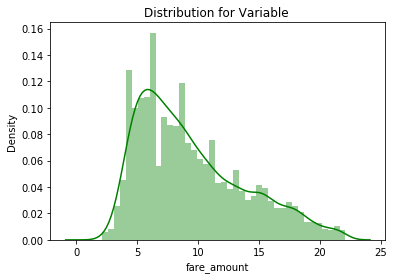

In [163]:
#Normality check of training data is uniformly distributed or not (CHECKING CONTINOUS VARIABLES ONLY)
#FARE_AMOUNT,DISTANCE ARE CONTINOUS, REST ALL ARE CATEGORICAL
sns.distplot(train['fare_amount'],bins='auto',color='green')
plt.title("Distribution for Variable ")
plt.ylabel("Density")
plt.show()

In [164]:
train['distance'].describe()

count    15524.000000
mean        15.453362
std        315.495489
min          0.000111
25%          1.278147
50%          2.194873
75%          3.949297
max       8667.542104
Name: distance, dtype: float64

In [165]:
train['fare_amount'].describe()

count    15524.000000
mean         9.438477
std          4.369271
min          1.140000
25%          6.000000
50%          8.500000
75%         12.100000
max         22.100000
Name: fare_amount, dtype: float64

In [166]:
train['distance']= (train['distance'] - min(train['distance']) )  /  (max(train['distance']) - min(train['distance']))

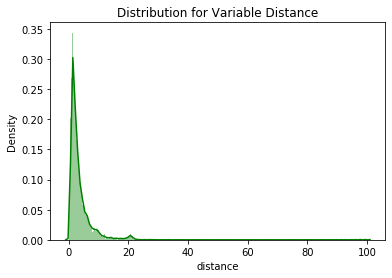

In [167]:
#Normality check for test data is uniformly distributed or not-

sns.distplot(test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable Distance")
plt.ylabel("Density")
plt.show()

# 9. Split the data into train and test data

In [168]:
train.head(10)

,fare_amount,passenger_count,year,Month,Date,Hour,distance
0,4.500000,1.0,2009,6,15,17,0.000119
1,17.121053,1.0,2010,1,5,16,0.000975
2,5.700000,2.0,2011,8,18,0,0.000160
3,7.700000,1.0,2012,4,21,4,0.000323
4,5.300000,1.0,2010,3,9,7,0.000231
5,12.100000,1.0,2011,1,6,9,0.000437
6,7.500000,1.0,2012,11,20,20,0.000179
7,16.500000,1.0,2012,1,4,17,0.000479
8,5.889474,1.0,2012,12,3,13,0.000145
9,8.900000,2.0,2009,9,2,1,0.000329


In [169]:
##train test split for further modelling
X_train, X_test, y_train, y_test = train_test_split( train.iloc[:, train.columns != 'fare_amount'], 
                         train.iloc[:, 0], test_size = 0.20, random_state = 1)

In [170]:
X_train.head(5) #(12765,7) pass_count,year,month,date,day,hour,distance
X_test.head(1)  #(3192) pass_count,year,month,date,day,hour,distance
y_train.head(1) #(12765) fareamount
y_test.head(1)  #(3192) fareamount

239    6.7
Name: fare_amount, dtype: float64

In [171]:
y_train.describe()

count    12419.000000
mean         9.459815
std          4.369938
min          1.140000
25%          6.000000
50%          8.500000
75%         12.100000
max         22.100000
Name: fare_amount, dtype: float64

In [172]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12419, 6)
(3105, 6)
(12419,)
(3105,)


# 10. Select the model

### Linear Regression Model :

In [173]:
# Building the model on  training dataset
LR = LinearRegression().fit(X_train , y_train)

In [174]:
#predicting using the model on train data
pred_train_LR = LR.predict(X_train)

In [175]:
#predicting using the model on test data
pred_test_LR = LR.predict(X_test)

In [176]:
##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

##calculating RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

In [177]:
#Root Mean Squared Error
print("RMSE For Training data = "+str(RMSE_train_LR))
print("RMSE For Test data = "+str(RMSE_test_LR))

RMSE For Training data = 4.316718229596762
RMSE For Test data = 4.295260274659148


In [178]:
#calculate R^2 for train data
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_LR) 

0.024130251618846077

In [179]:
r2_score(y_test, pred_test_LR) 

0.031946320077144263

In [180]:
X_test.head(1)

,passenger_count,year,Month,Date,Hour,distance
239,1.0,2009,2,13,16,0.000196


### Decision tree Model : 

In [181]:
DecisionTreeRegressor

sklearn.tree._classes.DecisionTreeRegressor

In [182]:
DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

In [183]:
#predicting using the model on train data
pred_train_DT = DT.predict(X_train)

#predicting using the model on test data
pred_test_DT = DT.predict(X_test)

In [184]:
##calculating RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

##calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

#Root Mean Squared Error
print("RMSE For Training data = "+str(RMSE_train_DT))
print("RMSE For Test data = "+str(RMSE_test_DT))

RMSE For Training data = 2.507125961636944
RMSE For Test data = 2.5558248510213057


In [185]:
## R^2 calculation for train data
r2_score(y_train, pred_train_DT) 

0.6708174836850633

In [186]:
## R^2 calculation for test data
r2_score(y_test, pred_test_DT) 

0.6572459093545092

### Random Forest Model :

In [187]:
#from sklearn.ensemble import RandomForestRegressor

In [188]:
RF = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)

In [189]:
#predicting using the model on train data
pred_train_RF = RF.predict(X_train)
#predicting using the model on test data
pred_test_RF = RF.predict(X_test)

In [190]:
##calculating RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))

##calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

In [191]:
#Root Mean Squared Error

print("RMSE For Training data = "+str(RMSE_train_RF))
print("RMSE For Test data = "+str(RMSE_test_RF))

RMSE For Training data = 0.8328977931477171
RMSE For Test data = 2.258942001147859


In [192]:
## calculate R^2 for train data
r2_score(y_train, pred_train_RF) 

0.9636697927555049

In [193]:
#Best 72.9
#calculate R^2 for test data
r2_score(y_test, pred_test_RF) 

0.7322492904774811

# Ensemble technique ---- XGBOOST

In [194]:
#from xgboost.sklearn import XGBClassifier
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import accuracy_score

In [195]:
model = XGBRegressor(max_depth=3,
                      subsample=1,
                      n_estimators=200,
                      learning_rate=0.1,
                      min_child_weight=1,
                      random_state=5
                     )


In [196]:
XGB = model.fit(X_train,y_train)

In [197]:
#predicting using the model on train data
pred_train_gb = XGB.predict(X_train)

#predicting using the model on test data
pred_test_gb = XGB.predict(X_test)

In [198]:
##calculating RMSE for train data
RMSE_train_gb = np.sqrt(mean_squared_error(y_train, pred_train_gb))
##calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_gb))

In [199]:
##calculating RMSE 
print("Root Mean Squared Error For Training data = "+str(RMSE_train_gb))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_RF))

Root Mean Squared Error For Training data = 2.0416335896850657
Root Mean Squared Error For Test data = 2.18771617456052


In [200]:
## R^2 calculation for test data
r2_score(y_train, pred_train_gb)

0.7817068755181392

In [201]:
r2_score(y_test, pred_test_gb) #now 81

0.7488677863292859

## Check the project report for explaination of why the metrics were used and how the model was finalized.

# Apply Finalized model on the Test Data
###  Ensemble technique ---- XGBOOST

In [202]:
model = XGBRegressor(max_depth=3,
                      subsample=1,
                      n_estimators=200,
                      learning_rate=0.1,
                      min_child_weight=1,
                      random_state=5
                     )

XGB = model.fit(X_train,y_train)

In [203]:
#Save the Model
joblib.dump(XGB,"C:/Users/Abhishek/Desktop/Cab_Prac_DOS/Python_Cab/XGB_Model.pkl")

['C:/Users/Abhishek/Desktop/Cab_Prac_DOS/Python_Cab/XGB_Model.pkl']

In [204]:
#Load the model from the file 
XGB_Model = joblib.load('XGB_Model.pkl')

In [205]:
predictions_XGB_test = XGB_Model.predict(test)

In [206]:
predictions_XGB_test

array([16.169563 , 16.169563 ,  7.7564816, ...,  7.2772026, 14.146325 ,
       11.9437   ], dtype=float32)

In [207]:
test['Predicted_fare'] = predictions_XGB_test

In [208]:
test.head(1)

,passenger_count,year,Month,Date,Hour,distance,Predicted_fare
0,1,2015,1,27,13,2.323259,16.169563


In [209]:
test.to_csv('xgb_predictions_Python.csv')